# ASSIGNMENT OF PANDAS

# Questions

# 1.

In [58]:
from datetime import datetime

# Example list of review dates (string format)
review_dates = ["2023-05-10", "2024-01-15", "2023-12-25", "2024-06-18"]

# Convert string dates to datetime objects
parsed_dates = [datetime.strptime(date, "%Y-%m-%d") for date in review_dates]

# Find the earliest and most recent dates
earliest_review = min(parsed_dates)
most_recent_review = max(parsed_dates)

# Convert back to string if needed
earliest_review = earliest_review.strftime("%Y-%m-%d")
most_recent_review = most_recent_review.strftime("%Y-%m-%d")

print("Earliest Review:", earliest_review)
print("Most Recent Review:", most_recent_review)


Earliest Review: 2023-05-10
Most Recent Review: 2024-06-18


# 2.

In [60]:

data = {
    "id": [1, 2, 3, 4, 5],
    "room_type": ["Private room", "Entire home/apt", "Private room", "Shared room", "Private room"]
}
df = pd.DataFrame(data)

# Count the number of private rooms
nb_private_rooms = df[df["room_type"] == "Private room"].shape[0]

print("Number of private rooms:", nb_private_rooms)


Number of private rooms: 3


# 3.

In [59]:

data = {
    "id": [1, 2, 3, 4, 5],
    "price": [100, 200, 150, 175, 125]
}
df = pd.DataFrame(data)

# Calculate the average price
avg_price = round(df["price"].mean(), 2)

print("Average Price:", avg_price)

Average Price: 150.0


# 4.

In [61]:

review_dates_list = ["2023-05-10", "2024-01-15", "2023-12-25", "2024-06-18"]
listings = [
    {"id": 1, "room_type": "Private room", "price": 100},
    {"id": 2, "room_type": "Entire home/apt", "price": 200},
    {"id": 3, "room_type": "Private room", "price": 150},
    {"id": 4, "room_type": "Shared room", "price": 175},
    {"id": 5, "room_type": "Private room", "price": 125}
]

# Calculate the first and last reviewed dates
review_dates = [datetime.strptime(date, "%Y-%m-%d") for date in review_dates_list]
first_reviewed = min(review_dates).strftime("%Y-%m-%d")
last_reviewed = max(review_dates).strftime("%Y-%m-%d")

# Count the number of private rooms
nb_private_rooms = sum(1 for listing in listings if listing["room_type"] == "Private room")

# Calculate the average price
avg_price = round(sum(listing["price"] for listing in listings) / len(listings), 2)

# Create the summary DataFrame
review_dates_df = pd.DataFrame({
    "first_reviewed": [first_reviewed],
    "last_reviewed": [last_reviewed],
    "nb_private_rooms": [nb_private_rooms],
    "avg_price": [avg_price]
})

print(review_dates_df)


  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2023-05-10    2024-06-18                 3      150.0


# 5.

In [62]:

data = {
    "neighborhood": ["A", "B", "A", "C", "B", "D", "D", "C", "A", "E", "E", "D"],
    "price": [100, 200, 150, 175, 250, 125, 100, 300, 180, 400, 350, 500]
}

df = pd.DataFrame(data)

# Group by neighborhood and calculate average price and number of listings
neighborhood_stats = df.groupby("neighborhood").agg(
    average_price=("price", "mean"),
    number_of_listings=("price", "size")
).reset_index()

# Sort by average price in descending order to find the most expensive neighborhoods
neighborhood_stats_sorted = neighborhood_stats.sort_values(by="average_price", ascending=False)

# Get the top 5 most expensive neighborhoods
top_5_expensive_neighborhoods = neighborhood_stats_sorted.head(5)

print(top_5_expensive_neighborhoods)


  neighborhood  average_price  number_of_listings
4            E     375.000000                   2
3            D     241.666667                   3
2            C     237.500000                   2
1            B     225.000000                   2
0            A     143.333333                   3


# 6.

In [64]:

data = {
    "description": [
        "This is a lovely apartment with great views",
        "A beautiful home with spacious rooms and a cozy atmosphere",
        "Comfortable and modern apartment, close to transportation",
        "A stunning penthouse with spectacular views of the city",
        "Lovely home in a quiet neighborhood, perfect for families"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# List of common stopwords to exclude
stopwords = set([
    "the", "and", "a", "to", "in", "of", "for", "on", "at", "with", "this", "is", "it", "that", 
    "by", "from", "as", "an", "be", "was", "were", "are", "have", "has", "had", "but", "or"
])

# Tokenize descriptions and remove stopwords
words = df["description"].str.lower().str.split()

# Flatten the list of words and filter out stopwords
filtered_words = [word for sublist in words for word in sublist if word not in stopwords and word not in string.punctuation]

# Count word frequencies using Counter
word_counts = Counter(filtered_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Convert to DataFrame for better readability
top_10_df = pd.DataFrame(top_10_words, columns=["Word", "Frequency"])

print(top_10_df)


         Word  Frequency
0      lovely          2
1       views          2
2        home          2
3   apartment          1
4       great          1
5   beautiful          1
6    spacious          1
7       rooms          1
8        cozy          1
9  atmosphere          1


# 7.

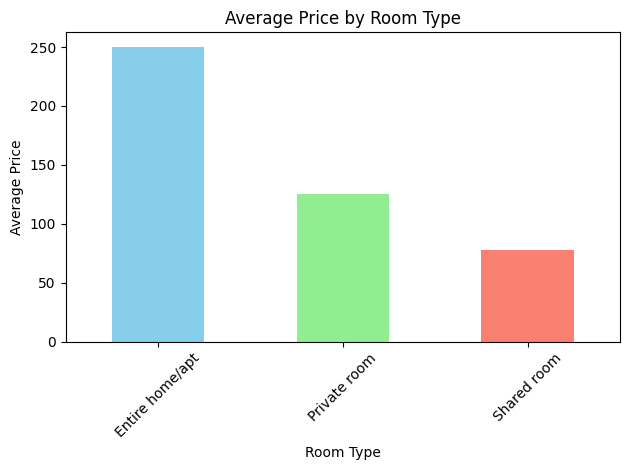

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "room_type": ["Private room", "Entire home/apt", "Private room", "Shared room", 
                  "Private room", "Entire home/apt", "Shared room", "Entire home/apt"],
    "price": [100, 200, 150, 75, 125, 250, 80, 300]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group by room_type and calculate the average price
avg_prices = df.groupby("room_type")["price"].mean()

# Create a bar chart
avg_prices.plot(kind="bar", color=["skyblue", "lightgreen", "salmon"])

# Add titles and labels
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

# 8.

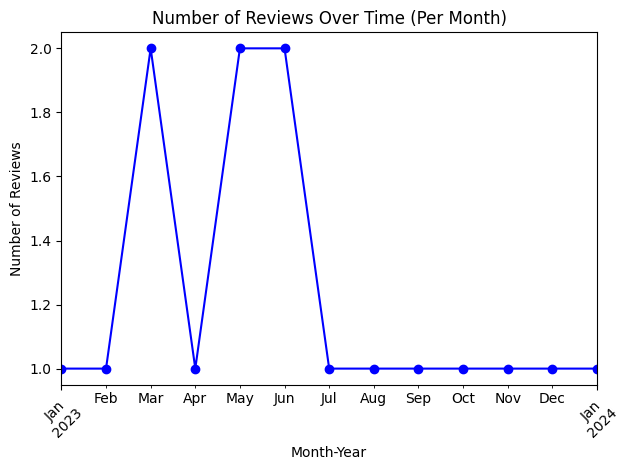

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "review_date": [
        "2023-01-15", "2023-02-20", "2023-03-25", "2023-03-05",
        "2023-04-17", "2023-05-19", "2023-05-21", "2023-06-10",
        "2023-06-15", "2023-07-08", "2023-08-22", "2023-09-05",
        "2023-10-01", "2023-11-13", "2023-12-25", "2024-01-10"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the 'review_date' to datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

# Group by year and month, then count the number of reviews
reviews_per_month = df.groupby(df['review_date'].dt.to_period('M')).size()

# Plot the trend over time
reviews_per_month.plot(kind='line', marker='o', color='b')

# Add titles and labels
plt.title('Number of Reviews Over Time (Per Month)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()



# 9.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl (11.1 MB)


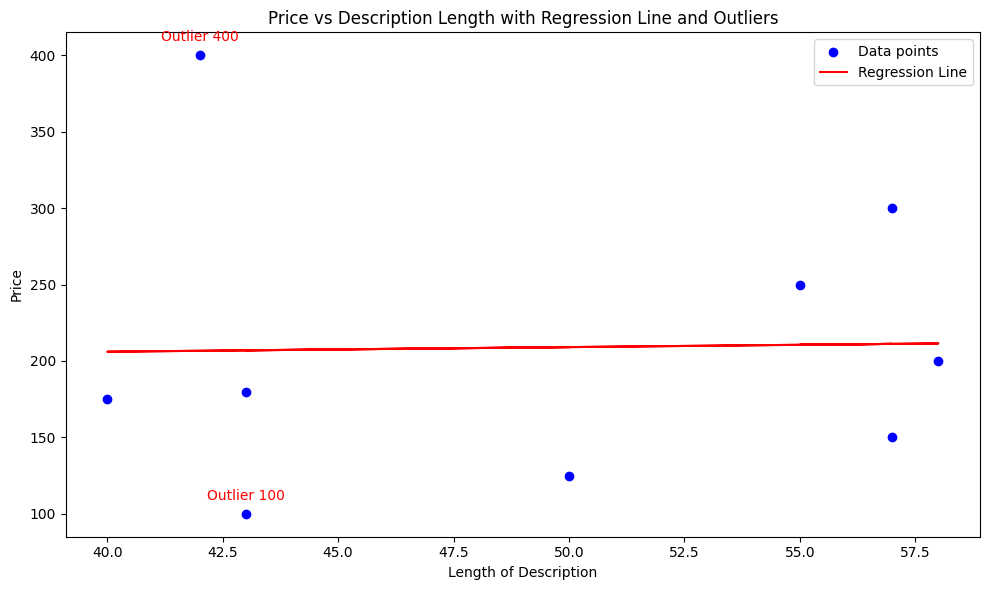

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = {
    "price": [100, 200, 150, 250, 300, 400, 175, 180, 125],
    "description": [
        "This is a lovely apartment with great views",
        "A beautiful home with spacious rooms and a cozy atmosphere",
        "Comfortable and modern apartment, close to transportation",
        "A stunning penthouse with spectacular views of the city",
        "Lovely home in a quiet neighborhood, perfect for families",
        "Luxurious penthouse with high-end finishes",
        "Affordable apartment in a prime location",
        "Cozy apartment with all the basic amenities",
        "Charming and stylish flat in the heart of the city"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the length of each description
df['description_length'] = df['description'].apply(len)

# Scatter plot of price vs description length
plt.figure(figsize=(10, 6))
plt.scatter(df['description_length'], df['price'], color='blue', label='Data points')

# Fit a linear regression model
X = df[['description_length']]
y = df['price']
regressor = LinearRegression()
regressor.fit(X, y)

# Plot the regression line
plt.plot(df['description_length'], regressor.predict(X), color='red', label='Regression Line')

# Identify outliers (points far from the regression line)
# For simplicity, let's assume an outlier is a point with a residual error > 100
predicted_prices = regressor.predict(X)
residuals = abs(df['price'] - predicted_prices)
outliers = df[residuals > 100]

# Annotate outliers on the plot
for i, row in outliers.iterrows():
    plt.annotate(f'Outlier {row["price"]}', 
                 (row['description_length'], row['price']),
                 textcoords="offset points", xytext=(0, 10), ha='center', color='red')

# Adding labels and title
plt.title('Price vs Description Length with Regression Line and Outliers')
plt.xlabel('Length of Description')
plt.ylabel('Price')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# 10.

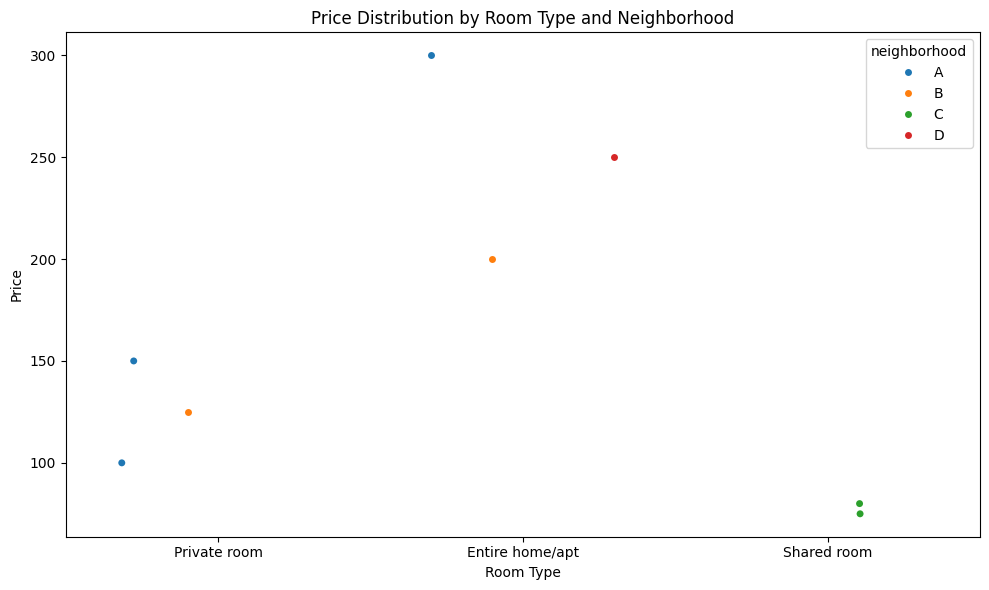

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "room_type": ["Private room", "Entire home/apt", "Private room", "Shared room", 
                  "Private room", "Entire home/apt", "Shared room", "Entire home/apt"],
    "price": [100, 200, 150, 75, 125, 250, 80, 300],
    "neighborhood": ["A", "B", "A", "C", "B", "D", "C", "A"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a strip plot using Seaborn
plt.figure(figsize=(10, 6))
sns.stripplot(x="room_type", y="price", hue="neighborhood", data=df, jitter=True, dodge=True)

# Add titles and labels
plt.title('Price Distribution by Room Type and Neighborhood')
plt.xlabel('Room Type')
plt.ylabel('Price')

# Display the plot
plt.tight_layout()
plt.show()


# 11.

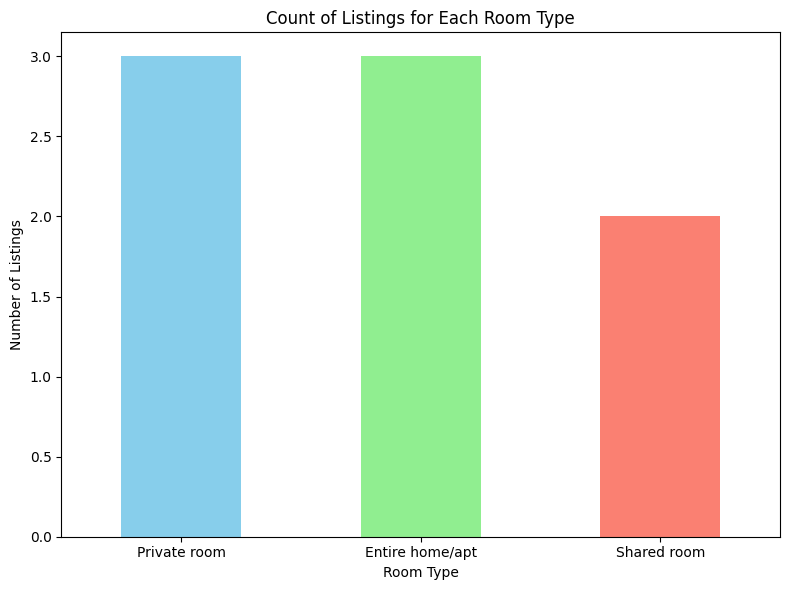

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "room_type": ["Private room", "Entire home/apt", "Private room", "Shared room", 
                  "Private room", "Entire home/apt", "Shared room", "Entire home/apt"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group by room_type and count the number of listings
room_type_counts = df['room_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])

# Add labels and title
plt.title('Count of Listings for Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)

# Display the chart
plt.tight_layout()
plt.show()


# 12.

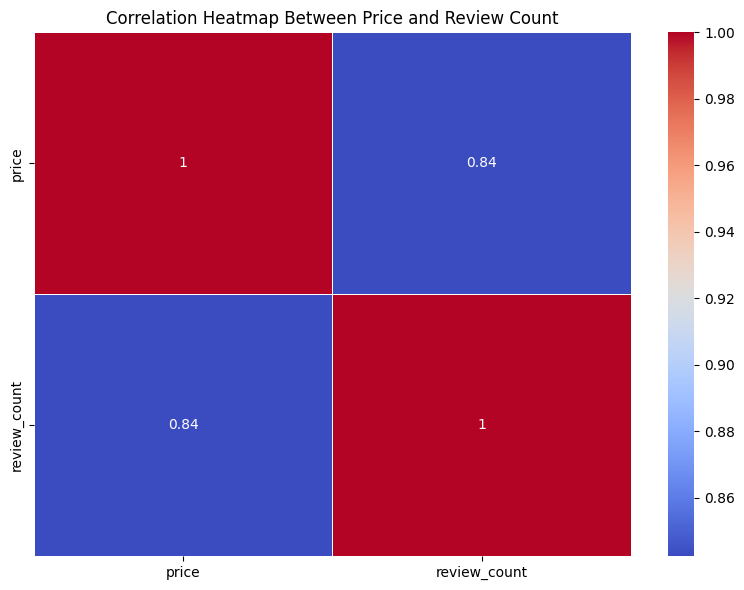

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "price": [100, 200, 150, 250, 300, 400, 175, 180, 125],
    "review_count": [5, 10, 15, 20, 30, 25, 18, 12, 8]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap Between Price and Review Count')

# Display the heatmap
plt.tight_layout()
plt.show()


# 13.

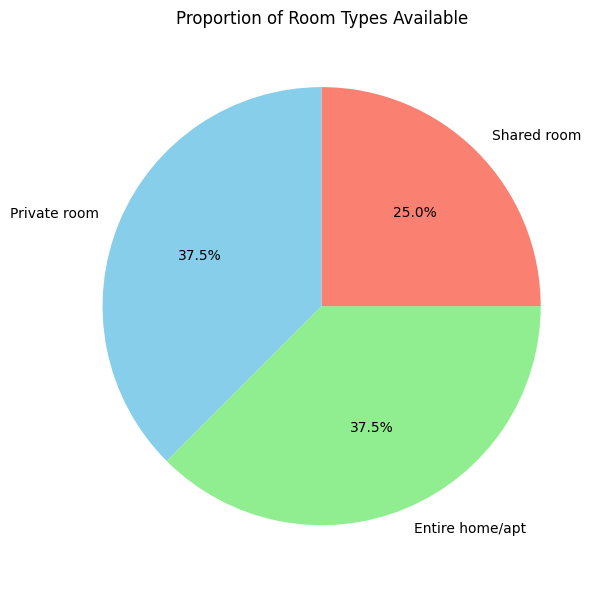

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "room_type": ["Private room", "Entire home/apt", "Private room", "Shared room", 
                  "Private room", "Entire home/apt", "Shared room", "Entire home/apt"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Count the number of occurrences for each room type
room_type_counts = df['room_type'].value_counts()

# Custom color palette
colors = ['skyblue', 'lightgreen', 'salmon']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Proportion of Room Types Available')

# Display the chart
plt.tight_layout()
plt.show()


# 14.

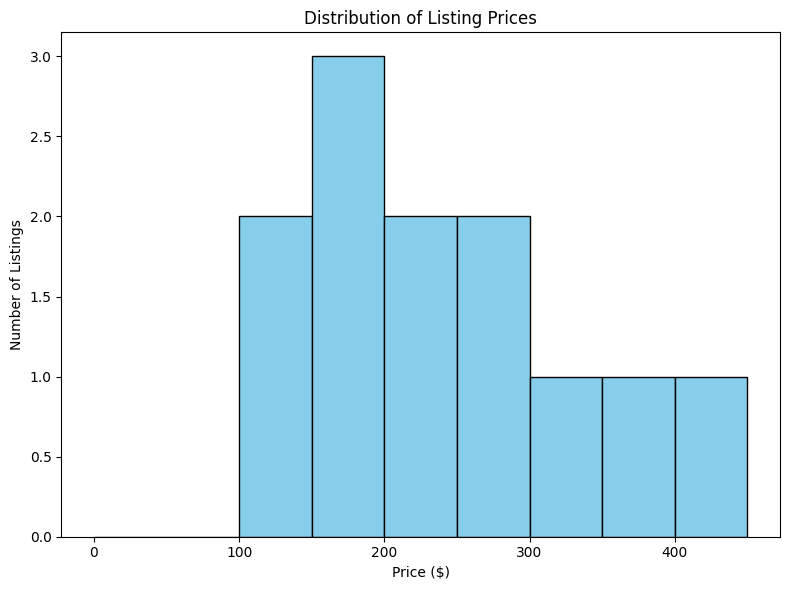

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "price": [100, 200, 150, 250, 300, 400, 175, 180, 125, 350, 275, 220]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a histogram of listing prices with bins of 50
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=range(0, 451, 50), color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')

# Display the histogram
plt.tight_layout()
plt.show()


# 15.

C:\Users\Syed_Ibrahim\AppData\Local\Temp\ipykernel_19956\1132626166.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='neighborhood', y='price', data=df, palette='muted')


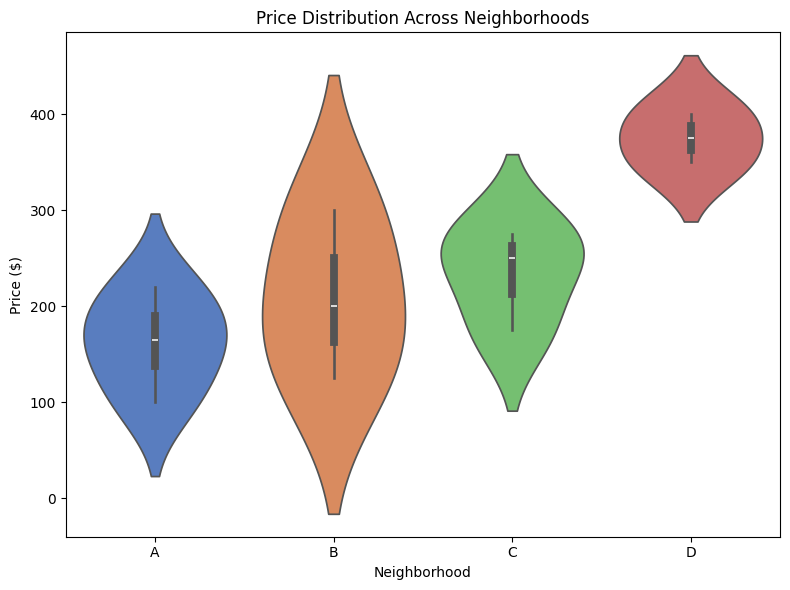

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "price": [100, 200, 150, 250, 300, 400, 175, 180, 125, 350, 275, 220],
    "neighborhood": ["A", "B", "A", "C", "B", "D", "C", "A", "B", "D", "C", "A"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a violin plot comparing price distributions across neighborhoods
plt.figure(figsize=(8, 6))
sns.violinplot(x='neighborhood', y='price', data=df, palette='muted')

# Add titles and labels
plt.title('Price Distribution Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price ($)')

# Display the plot
plt.tight_layout()
plt.show()
